# Evaluation

In [1]:
# Loading useful libraries

import numpy as np
import pandas as pd

import pickle

from sklearn.metrics import accuracy_score, f1_score, PrecisionRecallDisplay, precision_score, recall_score, r2_score

In [2]:
# Selecting "regression" or "classification"

model_type = "classification"

assert(model_type in ["regression", "classification"])

In [3]:
# Loading data

X_test = pd.read_csv(f'../tmp/X_test_{model_type}.csv', index_col='User_ID')
y_test = pd.read_csv(f'../tmp/y_test_{model_type}.csv', index_col='User_ID')['is_BigSpender']


# Loading model

with open('../tmp/model.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
# Selecting metric
metric = recall_score

# Computing score
score_test = metric(y_test, model.predict(X_test))
score_test

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.34971098265895956

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


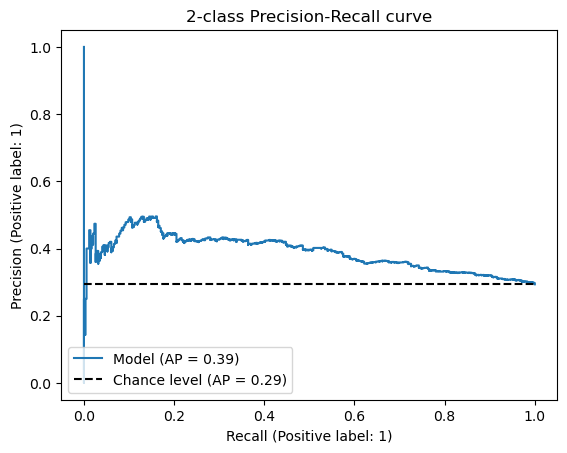

In [5]:
if model_type == "classification":
    display = PrecisionRecallDisplay.from_estimator(
        model, X_test, y_test, name="Model", plot_chance_level=True
    )
    _ = display.ax_.set_title("2-class Precision-Recall curve")

In [6]:
print(
f"""Accuracy: {accuracy_score(y_test, model.predict(X_test))}
Precision: {precision_score(y_test, model.predict(X_test))}
Recall: {recall_score(y_test, model.predict(X_test))}""")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy: 0.6709075487701441
Precision: 0.426056338028169
Recall: 0.34971098265895956
